In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
X_train =np.linspace(-1,1,20)

In [3]:
y_train = np.array([-0.6561, -0.3099, -0.59035, -0.50855, -0.285, 
                    -0.2443, -0.02445, 0.00135, -0.2006, 0.07475, 
                    -0.1422, 0.06515, 0.15265, 0.3521, 0.28415,  
                    0.5524, 0.23115, 0.20835, 0.4211,0.60485])

In [4]:
X_train

array([-1.        , -0.89473684, -0.78947368, -0.68421053, -0.57894737,
       -0.47368421, -0.36842105, -0.26315789, -0.15789474, -0.05263158,
        0.05263158,  0.15789474,  0.26315789,  0.36842105,  0.47368421,
        0.57894737,  0.68421053,  0.78947368,  0.89473684,  1.        ])

In [6]:
X_test = np.linspace(-1,1,20)

In [7]:
y_test = np.array([-0.69415, -0.451, -0.43005, -0.4484, -0.1475, 
                   -0.5019, -0.28055, 0.24595, -0.21425, -0.0286, 
                   0.23415, 0.46575, 0.07955, 0.1973, 0.0719, 
                   0.3639, 0.5536, 0.3365, 0.50705, 0.33435])

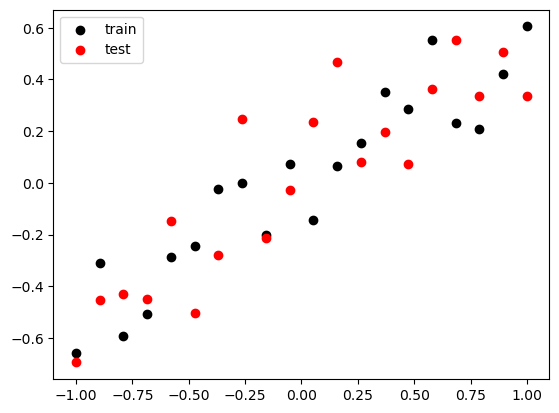

In [8]:
plt.scatter(X_train,y_train,c='black',label='train')
plt.scatter(X_test,y_test,c='red',label='test')
plt.legend()
plt.show()


In [9]:
model =  Sequential()

model.add(Dense(128,input_dim=1,activation="relu"))
model.add(Dense(128,activation="relu"))
model.add(Dense(1,activation="linear"))

adam = Adam(learning_rate=0.01)
model.compile(loss="mse",optimizer=adam,metrics=['mse'])

history = model.fit(X_train,y_train,epochs=500,validation_data=(X_test,y_test),verbose=False)

c:\Users\ACER\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
# evaluating model 
_,train_mse = model.evaluate(X_train,y_train,verbose=0)
_,test_mse = model.evaluate(X_test,y_test,verbose=0)
print('Train : {}, Test : {}'.format(train_mse,test_mse))

Train : 0.0035669333301484585, Test : 0.044661276042461395


In [16]:
y_pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


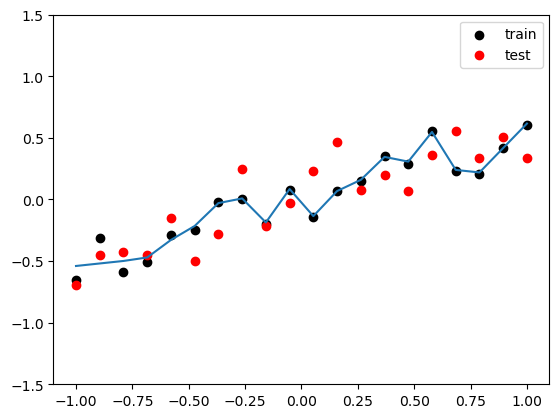

In [22]:

plt.scatter(X_train,y_train,c='black',label='train')
plt.scatter(X_test,y_test,c='red',label='test')
plt.plot(X_test,y_pred)
plt.legend()
plt.ylim((-1.5,1.5))
plt.show()


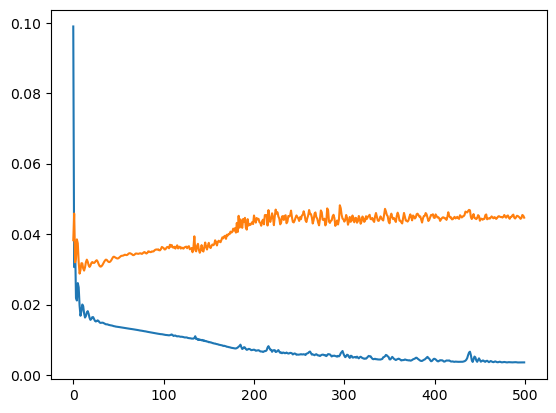

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


### Dropout Model

In [24]:
model =  Sequential()

model.add(Dense(128,input_dim=1,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1,activation="linear"))

adam = Adam(learning_rate=0.01)
model.compile(loss="mse",optimizer=adam,metrics=['mse'])
history = model.fit(X_train,y_train,epochs=500,validation_data=(X_test,y_test),verbose=False)

c:\Users\ACER\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
# evaluating model 
_,train_mse = model.evaluate(X_train,y_train,verbose=0)
_,test_mse = model.evaluate(X_test,y_test,verbose=0)
print('Train : {}, Test : {}'.format(train_mse,test_mse))

Train : 0.011406543664634228, Test : 0.03577616065740585


In [26]:
y_pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


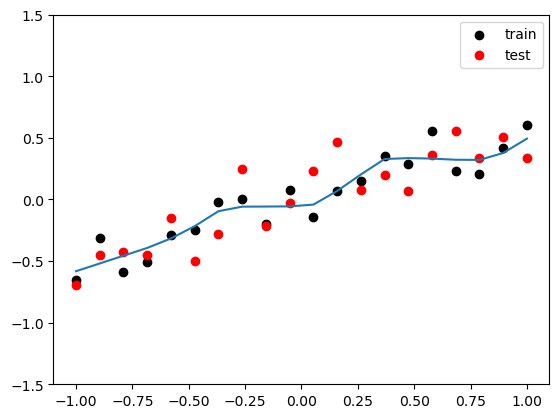

In [27]:
plt.scatter(X_train,y_train,c='black',label='train')
plt.scatter(X_test,y_test,c='red',label='test')
plt.plot(X_test,y_pred)
plt.legend()
plt.ylim((-1.5,1.5))
plt.show()

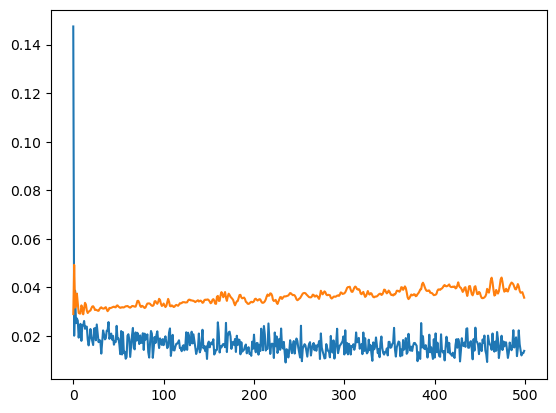

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])